In [1]:
!pip install gensim 


In [2]:
import pandas as pd 
import gensim 
import os
import spacy
nlp = spacy.load('en_core_web_lg')
import nltk

In [3]:
data = pd.read_csv('random.csv')
data.head()

,Id,text
0,0,Deep spelling Initial goal was to study .
1,1,and implement a hendwritten text line .
2,2,segmentation And here I come with
3,3,more complication etuly and .
4,4,implementation


In [4]:
#ref_sent = data.loc[data['Id']==3,'text'].iloc[0]
ref_sent1 = input("synonym to be find:")

synonym to be find:segment


In [5]:
ref_sent1

'segment'

In [6]:
ref_sent1_vec = nlp(ref_sent1) #vectorize reference sentence

In [7]:
all_docs = [nlp(row) for row in data ['text']]

In [8]:
sims = []
doc_id = []
for i in range (len(all_docs)):
    sim = all_docs[i].similarity(ref_sent1_vec)
    sims.append(sim)
    doc_id.append(i)
    sims_docs = pd.DataFrame(list(zip(doc_id,sims)), columns = ['doc_id','sims'])

In [9]:
sims_docs_sorted=sims_docs.sort_values(by = 'sims', ascending = False)

In [10]:
top10_sim_docs= data.iloc[sims_docs_sorted['doc_id'][:10]]

In [11]:
print(data[data["Id"]==5]['text'].values)

['Heckerfank . ']


In [12]:
top_sim_scores=pd.concat([top10_sim_docs, sims_docs_sorted['sims'][:10]], axis = 1)

In [13]:
for (text,sim) in zip(top_sim_scores['text'], top_sim_scores['sims']):
    print("the top 10 similar sentence are:{}\n with a similiarity score of {:.2f}\n".format(text,sim))

the top 10 similar sentence are:and implement a hendwritten text line . 
 with a similiarity score of 0.36

the top 10 similar sentence are:segmentation And here I come with 
 with a similiarity score of 0.33

the top 10 similar sentence are:Deep spelling Initial goal was to study . 
 with a similiarity score of 0.31

the top 10 similar sentence are:more complication etuly and .     
 with a similiarity score of 0.28

the top 10 similar sentence are:implementation  
 with a similiarity score of 0.21

the top 10 similar sentence are:Heckerfank . 
 with a similiarity score of 0.15



In [14]:
top1_sim_docs= data.iloc[sims_docs_sorted['doc_id'][:1]]

In [15]:
top_sim_scores1=pd.concat([top1_sim_docs, sims_docs_sorted['sims'][:1]], axis = 1)


In [16]:
for (text,sim) in zip(top_sim_scores1['text'], top_sim_scores1['sims']):
    print("the top 1 similar sentence are:{}\n with a similiarity score of {:.2f}\n".format(text,sim))
    x=print(sim)

the top 1 similar sentence are:and implement a hendwritten text line . 
 with a similiarity score of 0.36

0.3628717296348336


In [17]:
x=sim
print(x)

0.3628717296348336


C:\Users\ASUS\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ASUS\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ASUS\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3628717296348336
50.0


C:\Users\ASUS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


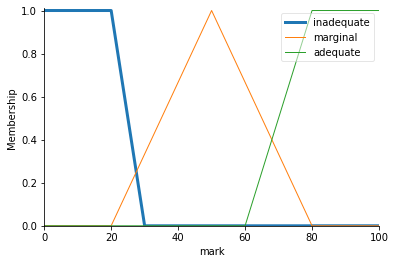

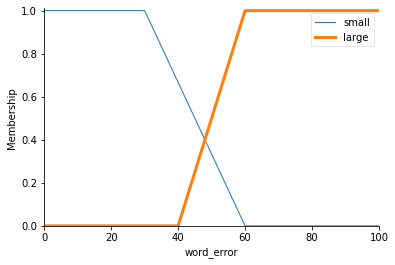

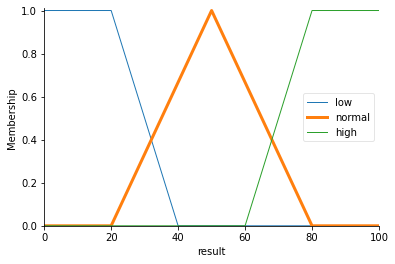

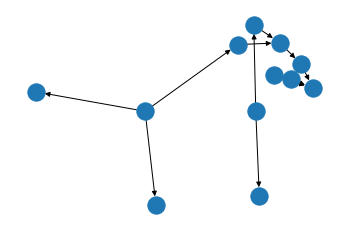

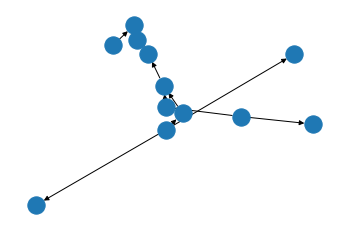

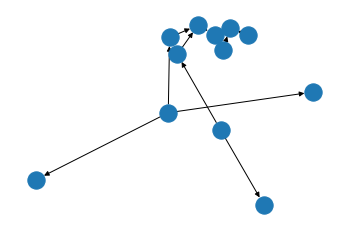

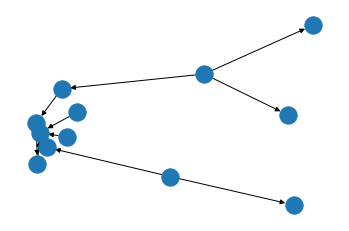

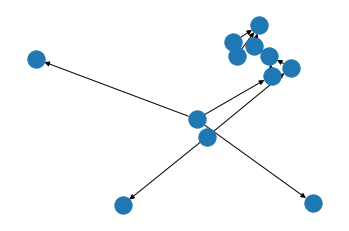

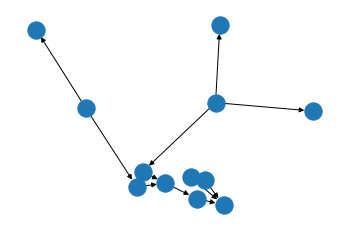

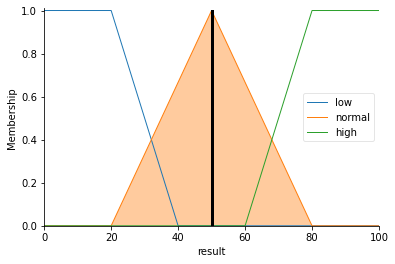

In [19]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


mark = ctrl.Antecedent(np.arange(0, 110, 10), 'mark' )
word_error = ctrl.Antecedent(np.arange(0, 110, 10), 'word_error' )
result = ctrl.Consequent(np.arange(0, 110, 10), 'result' )
#Auto-membership function population is possible with .automf(3, 5, or 7)
#funding.automf(3)
#stuffing.automf(3)

mark[ 'inadequate' ] = fuzz.trapmf(mark.universe, [ 0, 0, 20, 30])
mark[ 'marginal' ] = fuzz.trimf(mark.universe, [ 20, 50, 80])
mark[ 'adequate' ] = fuzz.trapmf(mark.universe, [ 60, 80, 100, 100])

word_error[ 'small' ] = fuzz.trapmf(word_error.universe, [ 0, 0, 30, 60])
word_error[ 'large' ] = fuzz.trapmf(word_error.universe, [ 40, 60, 100, 100])
# Custom membership functions can be built interactively with a familiar,
# Pythonic API
result[ 'low' ] = fuzz.trapmf(result.universe, [ 0, 0, 20, 40])
result[ 'normal' ] = fuzz.trimf(result.universe, [ 20, 50, 80])
result[ 'high' ] = fuzz.trapmf(result.universe, [ 60, 80, 100, 100])


# You can see how these look with .view()
mark[ 'inadequate' ].view()
word_error['large'].view()
result['normal'].view()

rule1 = ctrl.Rule(mark[ 'adequate' ] | word_error[ 'small' ], result[ 'normal' ])
rule2 = ctrl.Rule(mark[ 'marginal' ] & word_error[ 'large' ], result[ 'high' ])
rule3 = ctrl.Rule(mark[ 'inadequate' ] & word_error[ 'small' ], result['low'])
rule4 = ctrl.Rule(mark['marginal'] & word_error['large'], result['high'])
rule5 = ctrl.Rule(mark['adequate']& word_error['small'], result['high'])
rule6 = ctrl.Rule(mark['inadequate']& word_error['large'],result['normal'])
rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()

calc_result_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6])
calc_result = ctrl.ControlSystemSimulation(calc_result_ctrl)
print(x)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
calc_result.input[ 'mark' ] = x*100
calc_result.input[ 'word_error' ] = 18.5950
# Crunch the numbers
calc_result.compute()
print (calc_result.output[ 'result' ])
result.view(sim=calc_result)